# State Crime Rate Exploratory Data Analysis 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from scipy.stats import trim_mean 

In [5]:
pd.read_csv?
state_data = pd.read_csv('state.csv')
state_data.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [6]:
state_data.tail()

,State,Population,Murder.Rate,Abbreviation
45,Virginia,8001024,4.1,VA
46,Washington,6724540,2.5,WA
47,West Virginia,1852994,4.0,WV
48,Wisconsin,5686986,2.9,WI
49,Wyoming,563626,2.7,WY


In [9]:
state_data.shape

(50, 4)

In [16]:
# Adding a new column with derived data
state_data['PopulationInMillions']=state_data['Population']/1000000
state_data.head()

,State,Population,Murder.Rate,Abbreviation,PopulationInMillions
0,Alabama,4779736,5.7,AL,4.779736
1,Alaska,710231,5.6,AK,0.710231
2,Arizona,6392017,4.7,AZ,6.392017
3,Arkansas,2915918,5.6,AR,2.915918
4,California,37253956,4.4,CA,37.253956


In [18]:
#get the stats summary of state data
state_data.describe() 

,Population,Murder.Rate,PopulationInMillions
count,5.000000e+01,50.000000,50.000000
mean,6.162876e+06,4.066000,6.162876
std,6.848235e+06,1.915736,6.848235
min,5.636260e+05,0.900000,0.563626
25%,1.833004e+06,2.425000,1.833004
50%,4.436370e+06,4.000000,4.436369
75%,6.680312e+06,5.550000,6.680312
max,3.725396e+07,10.300000,37.253956


In [20]:
#information about type of data
state_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
State                   50 non-null object
Population              50 non-null int64
Murder.Rate             50 non-null float64
Abbreviation            50 non-null object
PopulationInMillions    50 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.0+ KB


In [23]:
#rename column murder.rate to MurderRate
state_data.rename(columns= {'Murder.Rate': 'MurderRate'}, inplace=True)
list(state_data)

['State', 'Population', 'MurderRate', 'Abbreviation', 'PopulationInMillions']

In [32]:
#we can even manually calculate mean of different features
Pop_mean = state_data['Population'].mean()
MurRate_mean = state_data.MurderRate.mean()
print('Population mean is:',Pop_mean,'\nMurderRate mean is:',MurRate_mean)

Population mean is: 6162876.3 
MurderRate mean is: 4.066


In [33]:
#we can even manually calculate median of different features
Pop_median = state_data['Population'].median()
MurRate_median = state_data.MurderRate.median()
print('Population mean is:',Pop_median,'\nMurderRate mean is:',MurRate_median)

Population mean is: 4436369.5 
MurderRate mean is: 4.0


In [36]:
# Mean after discarding top and bottom 10 % values eliminating outliers 
Pop_trimmean = trim_mean(state_data['Population'],0.1)
MurRate_trimmean = trim_mean(state_data['MurderRate'],0.1)
print('Population trim mean is:',Pop_trimmean,'\nMurderRate trim mean is:',MurRate_trimmean)

Population trim mean is: 4783697.125 
MurderRate trim mean is: 3.945


In [37]:
#to calculate murder rate per state population
murderRate_per_state = np.average(state_data['MurderRate'],weights = state_data['Population'])
print('Murder rate per state is:',murderRate_per_state)

Murder rate per state is: 4.44583398112


## EDA through data visualization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

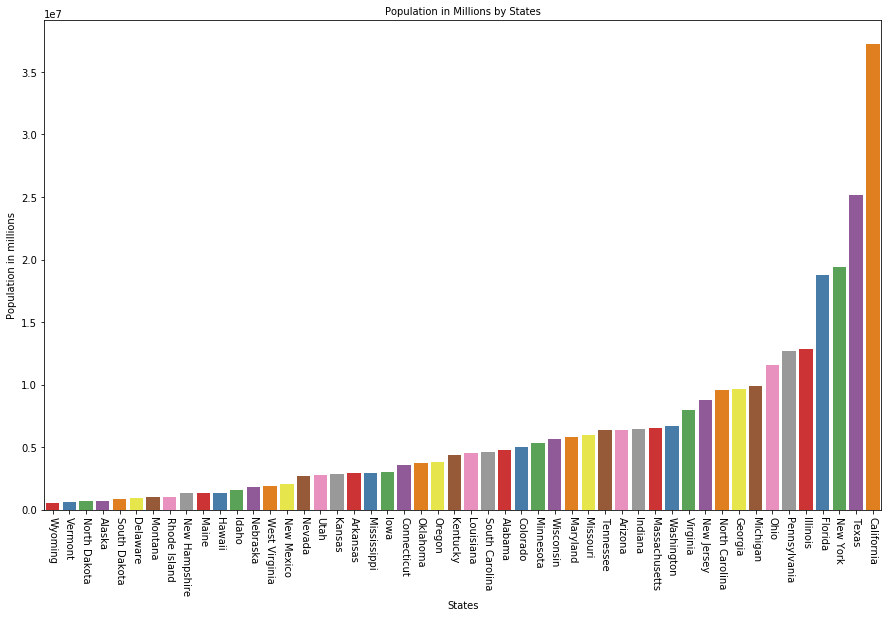

In [61]:
#lets plot population graph
fig,ax1 = plt.subplots()
fig.set_size_inches(15,  9) 
##ax1 = sns.barplot(x=state_data['State'],y=state_data['Population'])
ax1 = sns.barplot(x='State',y='Population',data =state_data.sort_values('Population',ascending=1),palette ="Set1" )
ax1.set(xlabel='States',ylabel='Population in millions')
ax1.set_title('Population in Millions by States', size=10)
plt.xticks(rotation=-90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

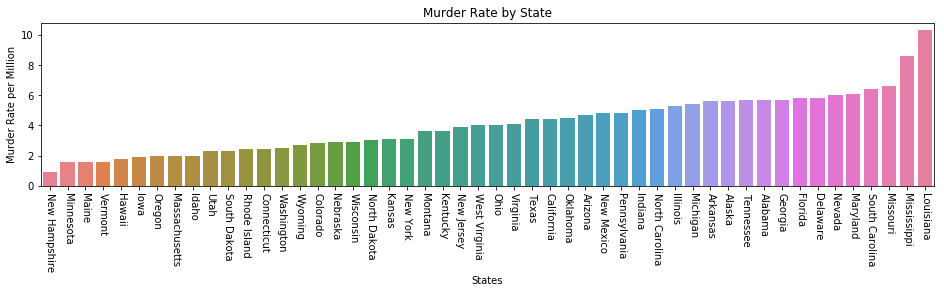

In [59]:
#plotting murder rate by state
fig2,ax2 = plt.subplots()
fig2.set_size_inches(16,3)
ax2=sns.barplot(x='State',y='MurderRate', data=state_data.sort_values('MurderRate',ascending=1),palette ='husl')
ax2.set(xlabel='States',ylabel='Murder Rate per Million')
ax2.set_title('Murder Rate by State')
plt.xticks(rotation=-90)

In [63]:
#calculate standard deviation
Pop_sd = state_data['Population'].std()
MurderRate_sd = state_data['MurderRate'].std()
print('Population standard deviation is:',Pop_sd,'\nMurderRate standard deviation is:',MurderRate_sd)

Population standard deviation is: 6848235.3474 
MurderRate standard deviation is: 1.9157361243


In [66]:
#calculate variance
Pop_var = state_data['Population'].var()
MurderRate_var = state_data['MurderRate'].var()
print('Population standard deviation is:',Pop_var,'\nMurderRate standard deviation is:',MurderRate_var)

Population standard deviation is: 4.68983273734e+13 
MurderRate standard deviation is: 3.67004489796


In [68]:
#Inter Quartile Range
Pop_IQR = state_data['Population'].describe()['75%']-state_data['Population'].describe()['25%']
MurderRate_IQR = state_data['MurderRate'].describe()['75%']-state_data['MurderRate'].describe()['25%']
print('Population IQR is:',Pop_IQR,'\nMurderRate IQR is:',MurderRate_IQR)

Population IQR is: 4847308.0 
MurderRate IQR is: 3.125
